In [1]:
import os, gensim
import numpy as np
from gensim import utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
class Dataloader:
    def __iter__(self):
        for genre in ['ballads', 'elegies', 'songs', 'novels']:
            for file in os.listdir('../datasets/lemmatized/' + genre):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    fname = '../datasets/lemmatized/' + genre + '/' + file
                    if genre == 'novels':
                        author = file.split('.')[0]
                    elif genre == 'ballads':
                        author = file.split('_')[2]
                    else:
                        author = file.split('_')[1]
                    yield utils.simple_preprocess(f.read()), genre, author, fname
sentences = Dataloader()

fnames = []
texts = []
true_labels = []
authors = []

for (sent, genre, author, fname) in sentences:
    if not sent:
        continue
    texts. append(sent)
    true_labels.append(genre)
    authors.append(author)
    fnames.append(fname)

In [3]:
tagged_docs = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(texts)]

In [4]:
tagged_docs[:2]

[TaggedDocument(words=['конь', 'мчалися', 'быстрый', 'стрела', 'только', 'снег', 'под', 'санями', 'скрипеть', 'как', 'нарочно', 'ямщик', 'мой', 'лихой', 'все', 'молчать', 'мне', 'песня', 'не', 'петь', 'все', 'было', 'печальный', 'вокруг', 'хоть', 'направо', 'хоть', 'влево', 'гляди', 'все', 'лишь', 'степь', 'да', 'лес', 'разве', 'вдруг', 'зачернеет', 'верста', 'впереди', 'печально', 'сквозь', 'туча', 'пора', 'месяц', 'ясный', 'светило', 'надо', 'мной', 'расскажи', 'мне', 'ямщик', 'что', 'нибудь', 'на', 'последок', 'ему', 'сказать', 'то', 'право', 'так', 'скучный', 'наш', 'путь', 'что', 'только', 'весь', 'время', 'дремать', 'ну', 'да', 'что', 'тебе', 'барин', 'сказать', 'коли', 'ничто', 'не', 'видал', 'мне', 'нигде', 'не', 'случаться', 'бывать', 'ни', 'кто', 'никуда', 'не', 'езжать', 'расскажи', 'как', 'ты', 'жить', 'что', 'узнать', 'потом', 'ямщик', 'как', 'попасть', 'ямщик', 'как', 'попасть', 'эх', 'том', 'много', 'сказывать', 'надо', 'тебе', 'знать', 'чтоб', 'быть', 'мне', 'теперь', '

In [5]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)

In [6]:
model.build_vocab(tagged_docs)

In [7]:
model.train(tagged_docs, total_examples=model.corpus_count, epochs=40)

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model.dv.vectors)
pca = PCA(n_components=16).fit(model.dv.vectors)
datapoint = pca.transform(model.dv.vectors)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(true_labels, kmeans.labels_))
print("Completeness:", metrics.completeness_score(true_labels, kmeans.labels_))
print("V-measure:", metrics.v_measure_score(true_labels, kmeans.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_labels, kmeans.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(model.dv.vectors, kmeans.labels_, sample_size=2000))

Homogeneity: 0.4208489343084888
Completeness: 0.6345797317951904
V-measure: 0.5060734324105194
Adjusted Rand-Index: 0.2798516110084102
Silhouette Coefficient: 0.3851067


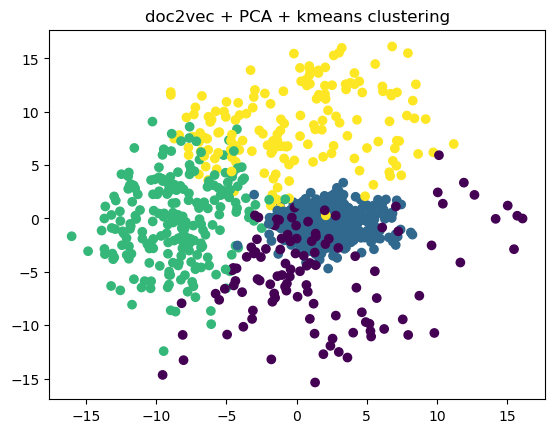

In [10]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

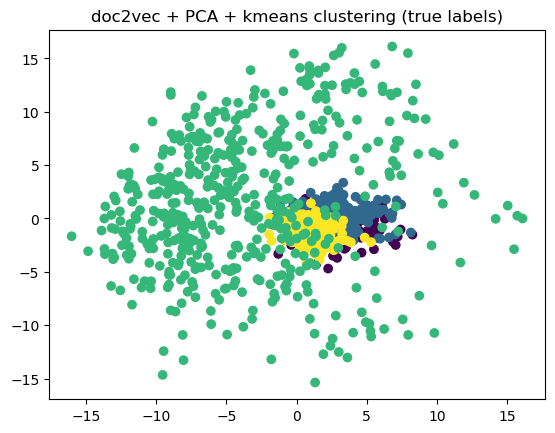

In [11]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_labels))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()

**Authors**

In [12]:
authors_ = []
for author in authors:
    if author.endswith('.txt'):
        author = author[:-4]
    authors_.append(author)

selected_authors = [i[0] for i in Counter(authors_).most_common(11) if i[0] != 'Unknown']
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_texts = [texts[num] for num in indeces]

In [13]:
tagged_docs_authors = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(selected_texts)]

In [14]:
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)

In [15]:
model2.build_vocab(tagged_docs_authors)
model2.train(tagged_docs_authors, total_examples=model2.corpus_count, epochs=40)

In [16]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model2.dv.vectors)
pca = PCA(n_components=16).fit(model2.dv.vectors)
datapoint = pca.transform(model2.dv.vectors)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
print("Homogeneity:", metrics.homogeneity_score(true_authors, kmeans.labels_))
print("Completeness:", metrics.completeness_score(true_authors, kmeans.labels_))
print("V-measure:", metrics.v_measure_score(true_authors, kmeans.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_authors, kmeans.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(model2.dv.vectors, kmeans.labels_, sample_size=2000))

Homogeneity: 0.13466062423187575
Completeness: 0.728902789502221
V-measure: 0.22732437034195094
Adjusted Rand-Index: 0.0399825294658268
Silhouette Coefficient: 0.7456361


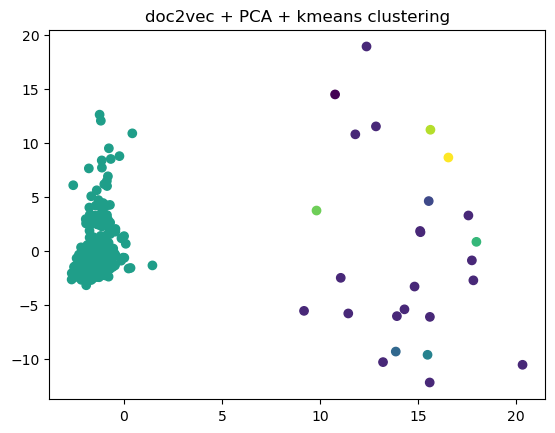

In [18]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

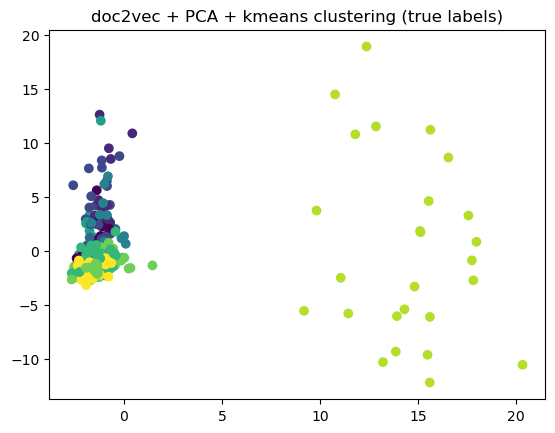

In [19]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_authors))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()

In [20]:
novels = [num for num, genre in enumerate(true_labels) if genre == 'novels']
novels_text = [text for num, text in enumerate(texts) if num in novels]
novels_authors = [text for num, text in enumerate(authors) if num in novels]
selected_authors = [i[0] for i in Counter(novels_authors).most_common(10)]
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_texts = [texts[num] for num in indeces]

In [21]:
tagged_docs_authors = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(selected_texts)]
model3 = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)
model3.build_vocab(tagged_docs_authors)
model3.train(tagged_docs_authors, total_examples=model3.corpus_count, epochs=40)

In [45]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model3.dv.vectors)
pca = PCA(n_components=16).fit(model3.dv.vectors)
datapoint = pca.transform(model3.dv.vectors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_authors, kmeans.labels_):.4f}
completeness_score: {metrics.completeness_score(true_authors, kmeans.labels_):.4f}
v_measure_score: {metrics.v_measure_score(true_authors, kmeans.labels_):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_authors, kmeans.labels_):.4f}
silhouette_score: {metrics.silhouette_score(model3.dv.vectors, kmeans.labels_, sample_size=2000):.4f}'''
)

homogeneity_score: 0.9220
completeness_score: 0.9378
v_measure_score: 0.9298
adjusted_rand_score: 0.8742
silhouette_score: 0.1195


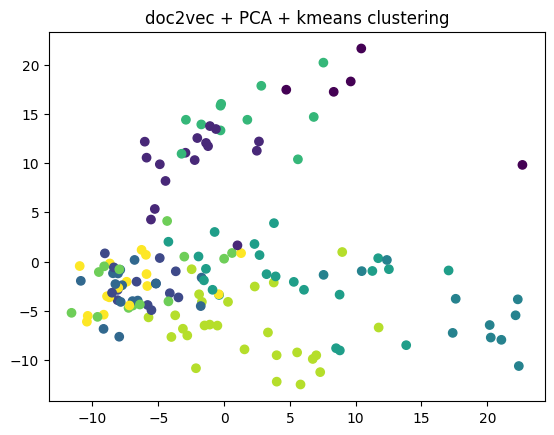

In [47]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

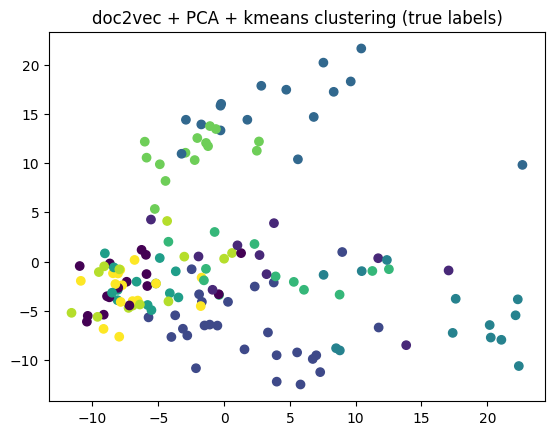

In [48]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_authors))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()